## 데이터 불러오기

In [23]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/AI hackathon/data/')

In [25]:
import pandas as pd
import numpy as np

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

In [26]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [27]:
#id 별로 각각 600개의 데이터가 있음을 확인   
train['id'].value_counts()

2047    600
1347    600
2378    600
1354    600
2379    600
       ... 
1699    600
675     600
2722    600
1698    600
0       600
Name: id, Length: 3125, dtype: int64

In [28]:
#train_labels.csv 에서 id 가 수행한 동작과 그에 따른 label값을 확인
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


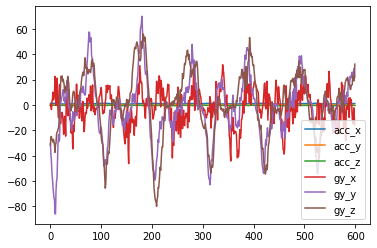

In [29]:
#id 별 동작들의 흐름 살펴보기
ex=train[train['id']==0]
ex.iloc[:,2:].plot()

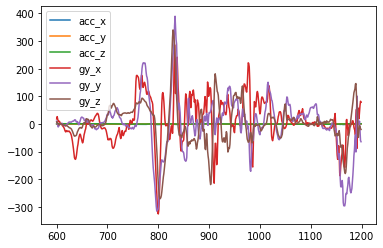

In [30]:
ex=train[train['id']==1]
ex.iloc[:,2:].plot()

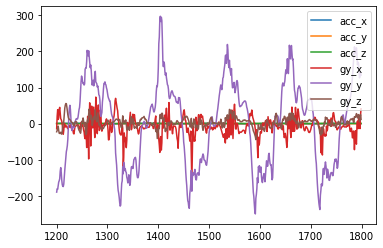

In [31]:
ex=train[train['id']==2]
ex.iloc[:,2:].plot()

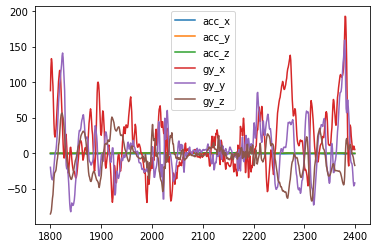

In [32]:
ex=train[train['id']==3]
ex.iloc[:,2:].plot()

In [33]:
#test'id'는 782개 
test['id'].nunique()

782

In [34]:
#782개의 id 별 동작 데이터를 활용해 각각의id가 어떤 동작인지를 분류하는 문제!!
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 라이브러리 불러오기 

In [35]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

## 데이터 수정

In [36]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [37]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

## 모델 학습 및 예측 

In [38]:
#가벼운 모델 생성
model = Sequential()
model.add(LSTM(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(X,y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 9s 336ms/step - loss: 3.6963 - accuracy: 0.3596 - val_loss: 3.2216 - val_accuracy: 0.4976
Epoch 2/30
20/20 [==============================] - 6s 300ms/step - loss: 2.9776 - accuracy: 0.4828 - val_loss: 2.7406 - val_accuracy: 0.4976
Epoch 3/30
20/20 [==============================] - 6s 302ms/step - loss: 2.7384 - accuracy: 0.4828 - val_loss: 2.6891 - val_accuracy: 0.4976
Epoch 4/30
20/20 [==============================] - 6s 302ms/step - loss: 2.6830 - accuracy: 0.4828 - val_loss: 2.6625 - val_accuracy: 0.4976
Epoch 5/30
20/20 [==============================] - 6s 312ms/step - loss: 2.6375 - accuracy: 0.4828 - val_loss: 2.6408 - val_accuracy: 0.4976
Epoch 6/30
20/20 [==============================] - 6s 302ms/step - loss: 2.5915 - accuracy: 0.4828 - val_loss: 2.6104 - val_accuracy: 0.4976
Epoch 7/30
20/20 [==============================] - 6s 305ms/step - loss: 2.5444 - accuracy: 0.4828 - val_loss: 2.5791 - val_accuracy: 0.4976
Epoch 

In [40]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [41]:
prediction=model.predict(test_X)

In [42]:
prediction.shape

(782, 61)

## 제출

In [43]:
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
submission.iloc[:,1:]=prediction

In [45]:
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,0.005121,0.008497,0.000039,0.000624,0.049257,0.003709,0.050219,0.011961,0.000353,0.003427,0.006592,0.004587,0.005715,0.000498,0.014660,0.000645,0.016011,0.002279,0.001731,0.001845,3.726031e-04,0.007483,0.004929,0.010114,0.004345,0.003095,0.508481,0.003711,0.000039,0.001403,0.008580,0.007198,0.000487,0.009305,0.001595,0.000593,0.000178,0.005160,0.008927,0.000807,0.001890,0.000784,0.007842,0.032077,0.018135,0.013312,0.003431,0.011806,0.015012,0.001365,0.015929,0.001910,0.002277,0.000468,0.034890,0.000131,0.001925,0.009936,0.000401,0.048374,0.003535
1,3126,0.002998,0.086706,0.001468,0.003636,0.012705,0.002987,0.015897,0.021890,0.001006,0.036441,0.002572,0.008127,0.001256,0.004348,0.013580,0.001743,0.009016,0.002323,0.008920,0.001674,1.273701e-04,0.000609,0.002908,0.006329,0.019988,0.001425,0.532433,0.008824,0.000035,0.000033,0.004567,0.006254,0.000571,0.020917,0.008204,0.001194,0.000973,0.010497,0.000862,0.000111,0.007095,0.002851,0.000987,0.003592,0.024185,0.006746,0.004045,0.001520,0.002910,0.004286,0.015236,0.002752,0.001326,0.000957,0.005961,0.001818,0.000287,0.027364,0.002056,0.014328,0.003543
2,3127,0.001326,0.002413,0.000112,0.000603,0.025142,0.016365,0.004718,0.003600,0.002013,0.004639,0.013901,0.010408,0.001428,0.000023,0.001972,0.005526,0.006023,0.005465,0.011087,0.002710,1.471211e-03,0.003897,0.002226,0.001398,0.014263,0.009231,0.490033,0.001867,0.002646,0.040144,0.013017,0.013786,0.000535,0.005305,0.006899,0.001072,0.002247,0.009536,0.005947,0.011431,0.022222,0.004136,0.024257,0.018514,0.000681,0.002440,0.012526,0.044841,0.013563,0.010120,0.010802,0.006728,0.001350,0.000168,0.000990,0.001277,0.036696,0.010357,0.018604,0.002649,0.000655
3,3128,0.001258,0.000984,0.000019,0.000224,0.000311,0.000057,0.001793,0.007869,0.062660,0.007336,0.002334,0.009236,0.008761,0.000582,0.031685,0.000259,0.000189,0.000122,0.000200,0.000021,6.148255e-07,0.000240,0.001254,0.003520,0.005950,0.000094,0.688296,0.000945,0.002836,0.000122,0.000378,0.000325,0.008372,0.000603,0.000502,0.000069,0.000714,0.001654,0.001897,0.001312,0.001777,0.000082,0.000058,0.003539,0.011115,0.017393,0.000042,0.001325,0.031176,0.005881,0.011473,0.006640,0.011942,0.000031,0.000794,0.000359,0.000027,0.003297,0.000778,0.001303,0.035986
4,3129,0.002428,0.004950,0.000267,0.001797,0.002775,0.000355,0.000711,0.002319,0.002630,0.007853,0.010494,0.002264,0.002710,0.000568,0.005980,0.003462,0.001358,0.004646,0.010870,0.000882,6.996677e-04,0.004288,0.007395,0.001567,0.008633,0.000642,0.758756,0.001007,0.000894,0.000153,0.016515,0.001532,0.004959,0.007869,0.003026,0.002568,0.003481,0.008320,0.000868,0.000144,0.000618,0.000317,0.001523,0.004255,0.003571,0.001812,0.004669,0.003994,0.004927,0.028205,0.018095,0.007558,0.002181,0.000453,0.000628,0.000567,0.000337,0.000938,0.004951,0.001510,0.006253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.001206,0.007390,0.000092,0.001019,0.034022,0.038585,0.030798,0.002467,0.000043,0.007306,0.010192,0.012464,0.000417,0.000151,0.002052,0.002252,0.024557,0.011220,0.015802,0.010535,2.996283e-03,0.003173,0.001447,0.002128,0.009757,0.016459,0.450070,0.003825,0.000038,0.005192,0.015932,0.014330,0.000045,0.004072,0.009746,0.000586,0.000954,0.005927,0.002851,0.001336,0.031609,0.007615,0.029576,0.028899,0.001356,0.005201,0.005739,0.016118,0.002206,0.002515,0.023716,0.004772,0.000687,0.000759,0.004707,0.000543,0.013294,0.036650,0.001684,0.018807,0.000116
778,3903,0.024197,0.024039,0.000253,0.002791,0.155639,0.003151,0.001353,0.013997,0.000871,0.004557,0.012040,0.005126,0.000448,0.000391,0.005068,0.003189,0.010382,0.062241,0.048347,0.005903,1.833690e-03,0.00313

In [46]:
submission.to_csv('baseline_submission.csv', index=False)